# Liabraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score

# Loading Dataset

In [4]:
data = pd.read_csv("Medicaldataset.csv")
# Showing first 5 rows
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# Data Processing

In [5]:
# Assiging Result column to int type. Positive = 1 and Negative = 0
data["Result"] = (data["Result"] == "positive").astype(int)
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [6]:
# separate the features (X) and target variable (y)
X = data.drop("Result", axis=1)
y = data["Result"]
print(X,y)

      Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  
0                           83        160.0   1.80     0.012  
1                           46        296.0   6.75     1.060  
2                           77        270.0   1.99     0.003  
3                           55        270.0  13.87 

# Exploratory Data Analysis (EDA) and Visualization

Data Summary:
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin  Result  
0        160.0   1.80     0.012       0  
1        296.0   6.75     1.060       1  
2        270.0   1.99     0.003       0  
3        270.0  13.87     0.122       1  
4        300.0   1.08     0.003       0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age           

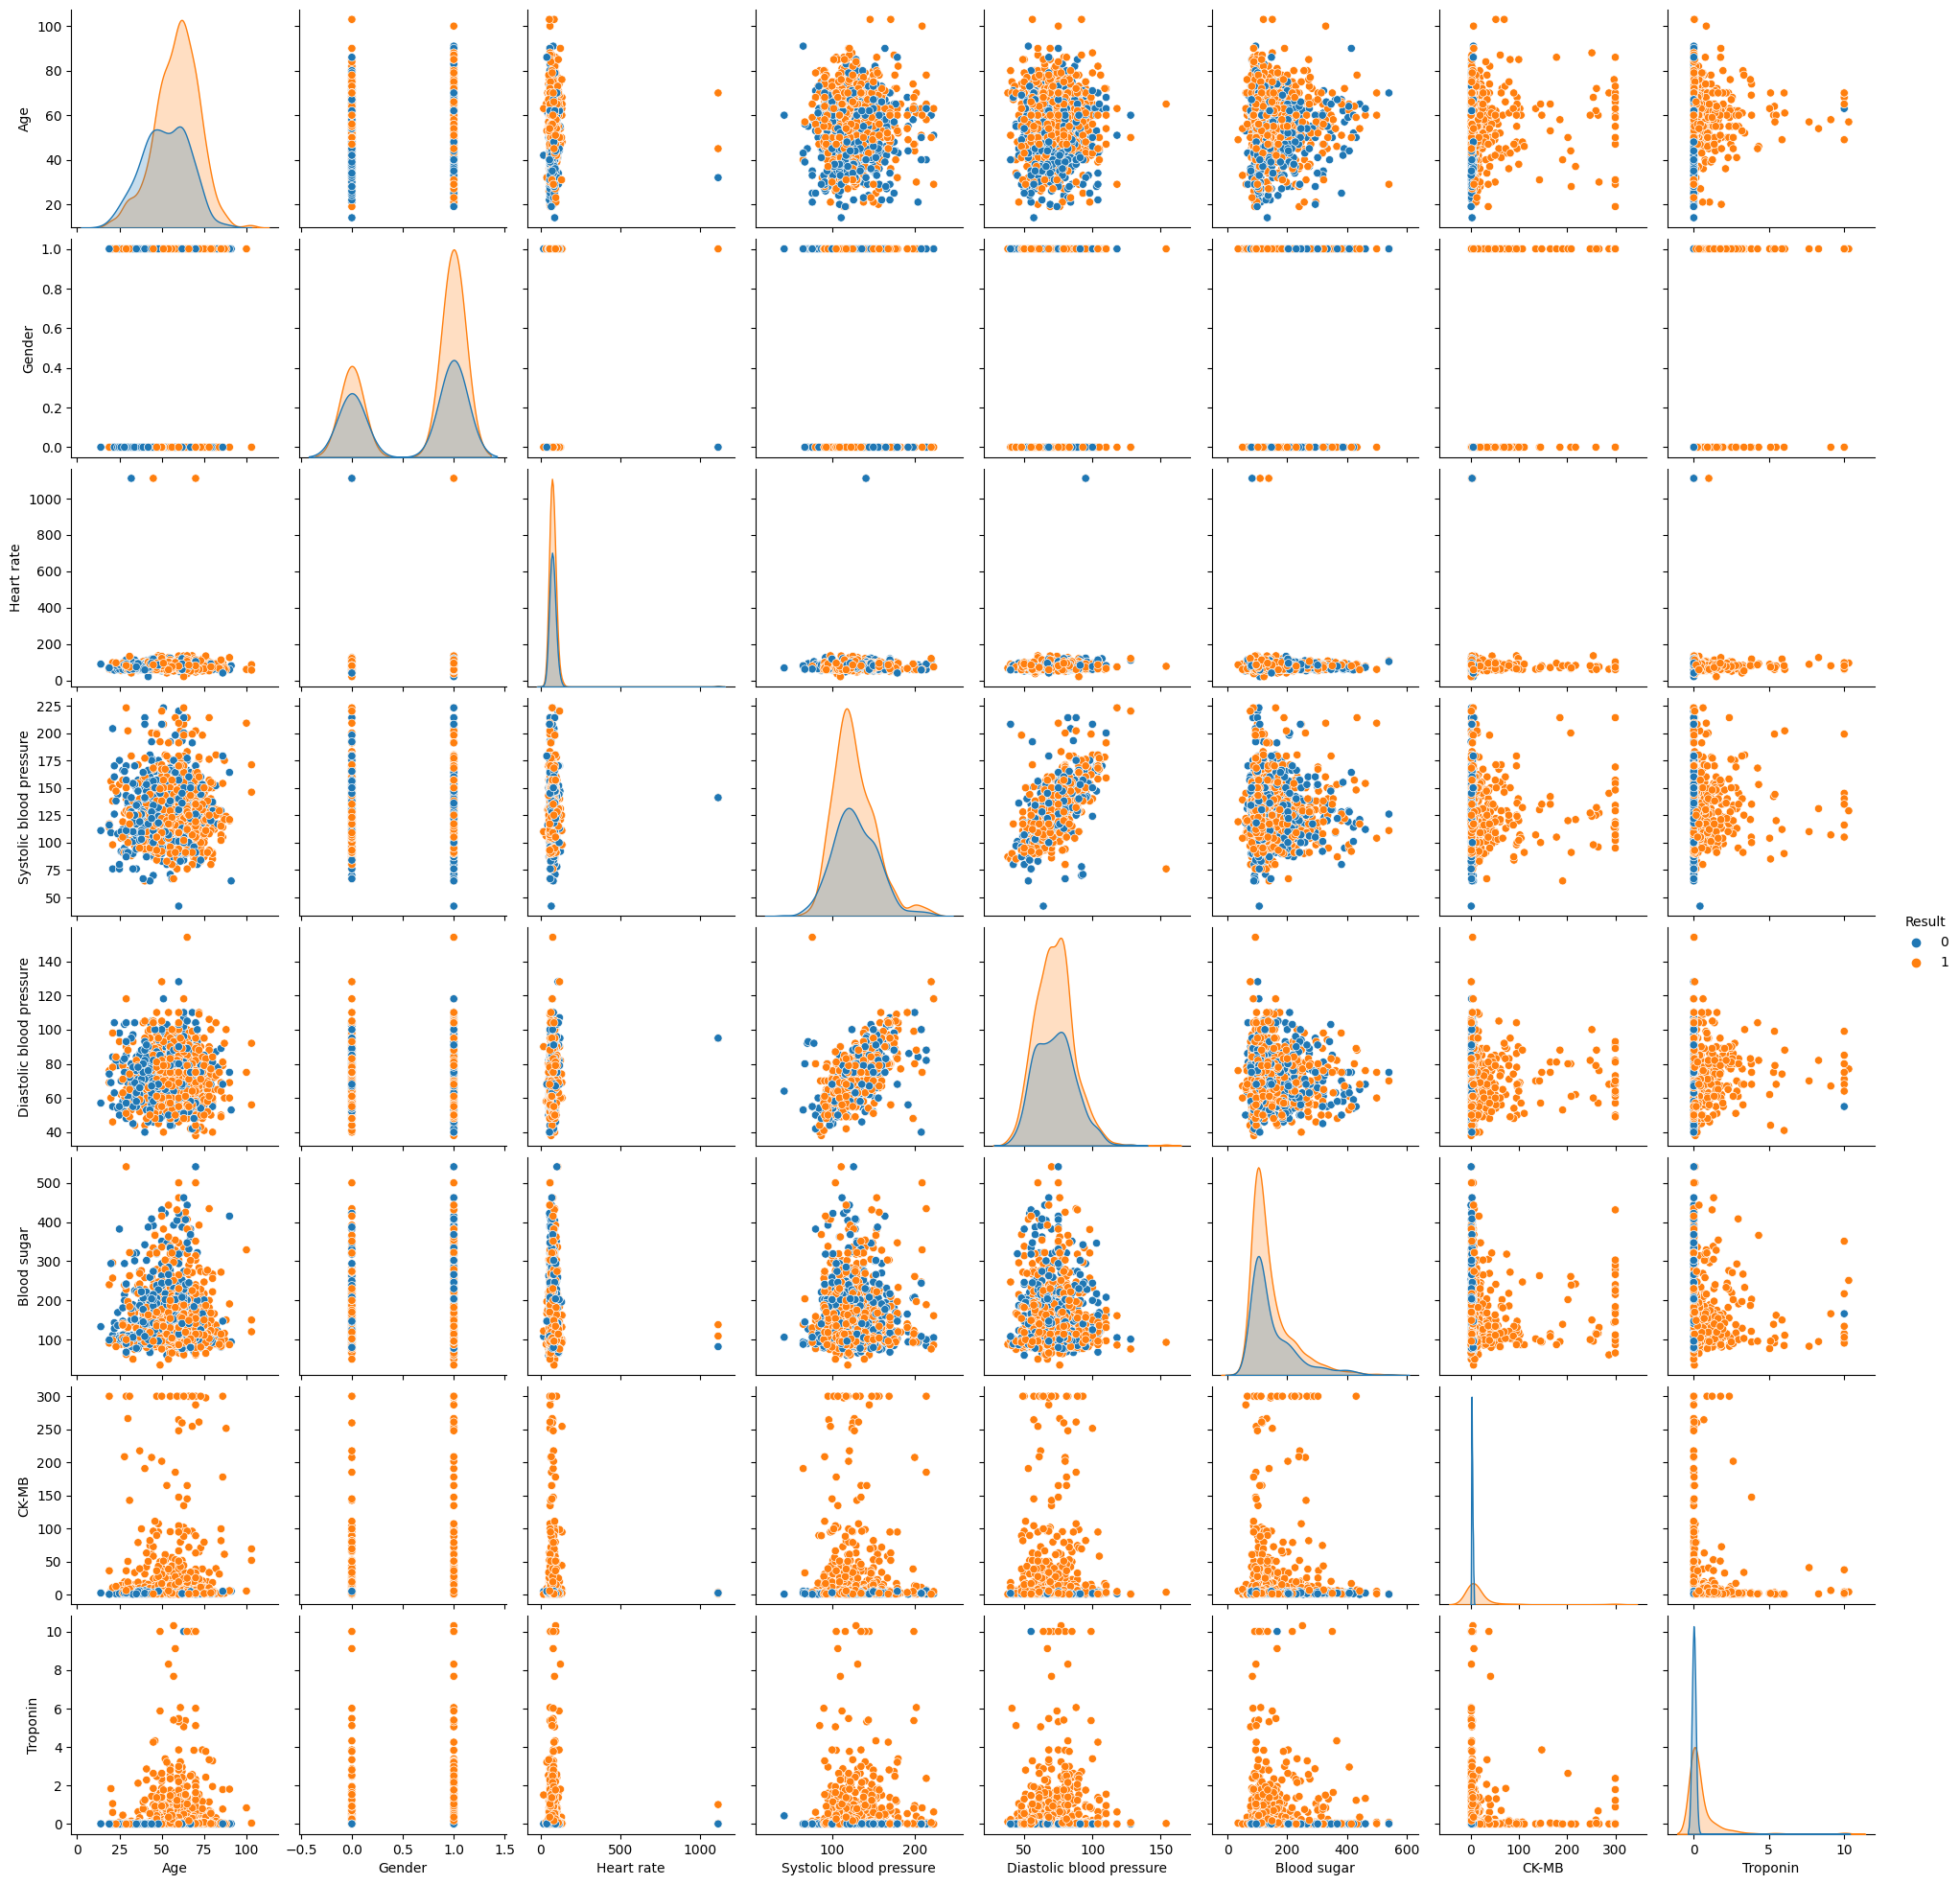

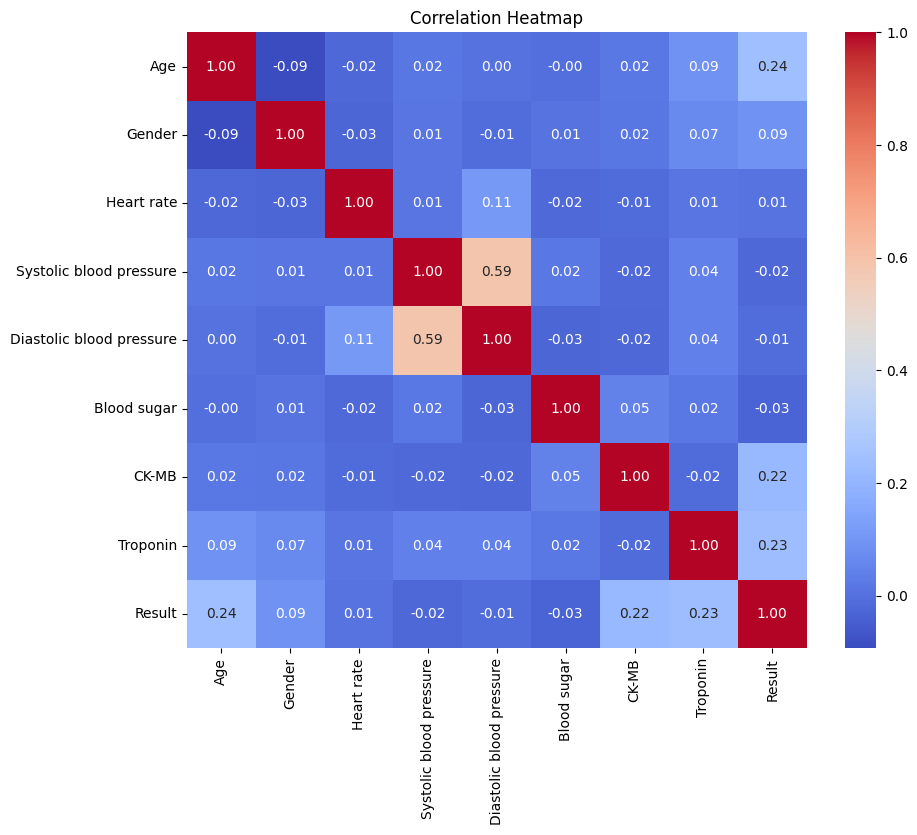

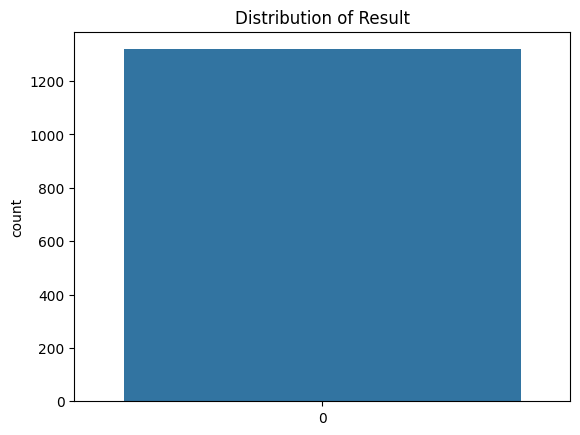

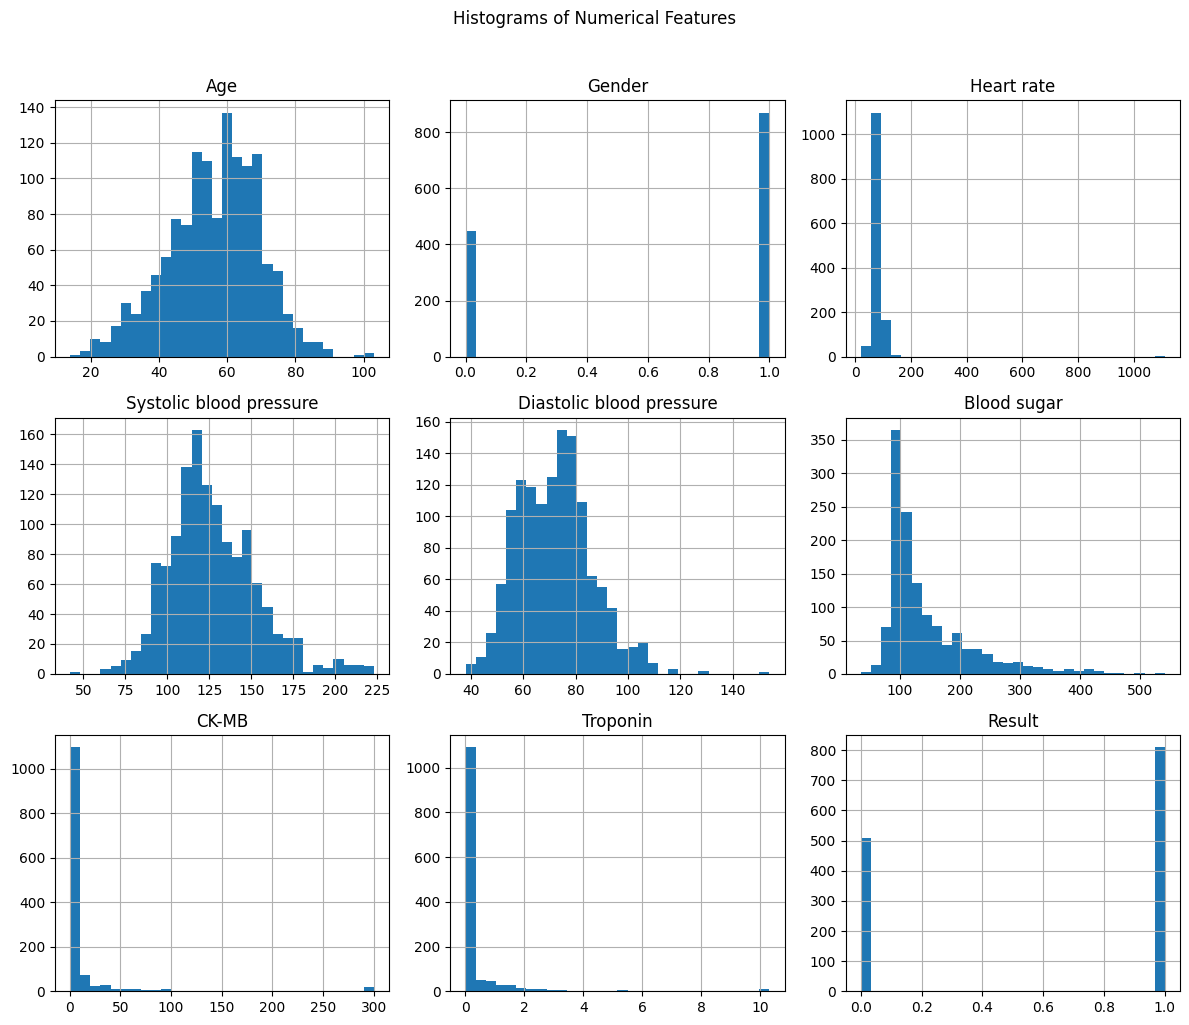

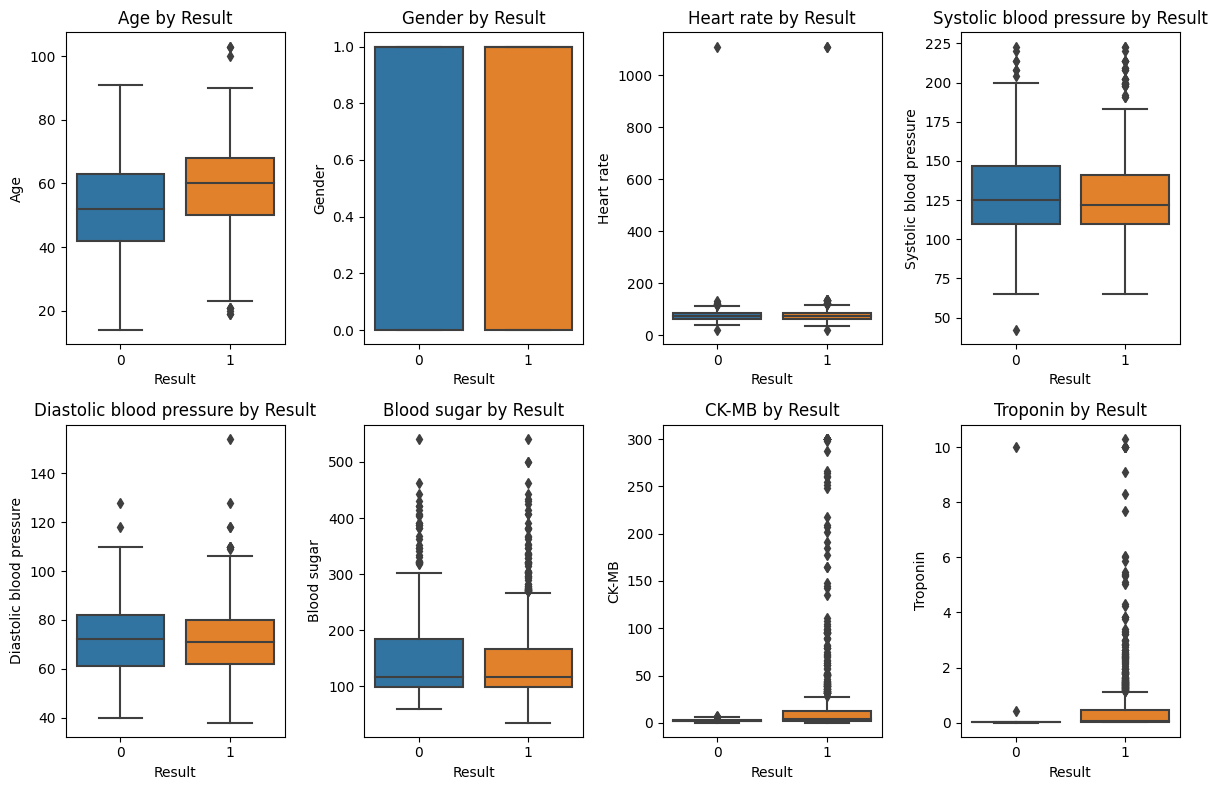

In [ ]:
# Step : Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Step : Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue="Result", diag_kind="kde")
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of the target variable 'Outcome'
sns.countplot(data["Result"])
plt.title("Distribution of Result")
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for numerical features by Outcome
numerical_features = data.drop("Result", axis=1).columns
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x="Result", y=feature, data=data)
    plt.title(f'{feature} by Result')
plt.tight_layout()
plt.show()

# Train and test data split

In [7]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Training

**Random Forest**


In [ ]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

**KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

**Naive Bayes**

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

**Logistic Regression**

In [8]:
lr_model = LogisticRegression(max_iter=10000)
lr_model = lr_model.fit(X_train, y_train)

# Feature Importance Calculation

**Random Forest**

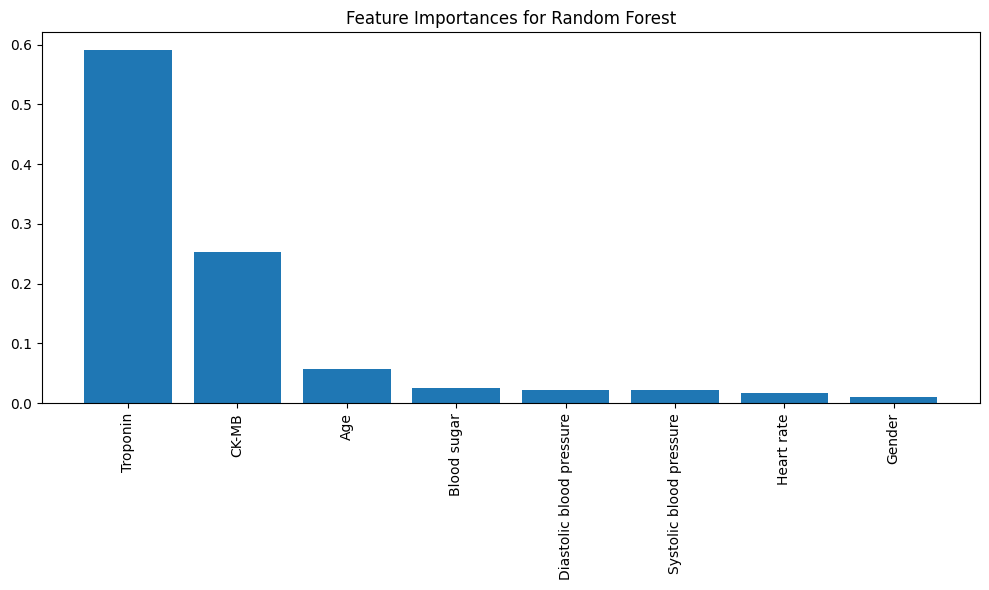

In [ ]:
# Calculate feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

#  Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


# Model training with cross validation

**Random Forest**

Cross-Validation Scores: [0.96590909 0.99242424 0.99242424 0.98863636 1.        ]
Mean Cross-Validation Score: 0.9878787878787879


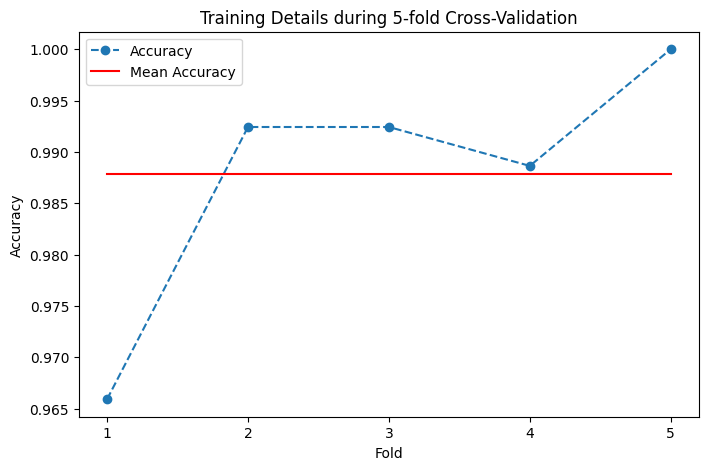

In [ ]:
# Model training with 5-fold cross-validation
rf_classifier = RandomForestClassifier()
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(rf_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

**KNN**

Cross-Validation Scores: [0.62878788 0.61363636 0.625      0.62878788 0.65779468]
Mean Cross-Validation Score: 0.6308013596036409


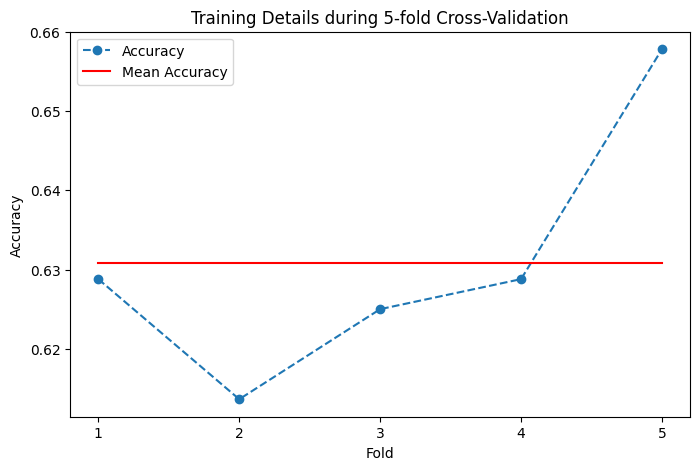

In [ ]:
# Model training with 5-fold cross-validation
knn_model = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(knn_model, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

**Naive Bayes**

Cross-Validation Scores: [0.88257576 0.68181818 0.68560606 0.61742424 0.6539924 ]
Mean Cross-Validation Score: 0.7042833275723008


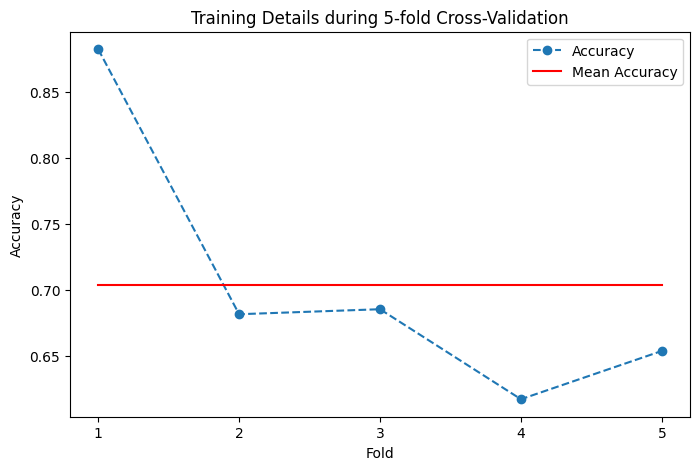

In [ ]:
# Model training with 5-fold cross-validation
nb_model = GaussianNB()
cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(nb_model, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

**Logistic Regression**

Cross-Validation Scores: [0.77651515 0.79924242 0.78409091 0.81818182 0.80228137]
Mean Cross-Validation Score: 0.7960623343703193


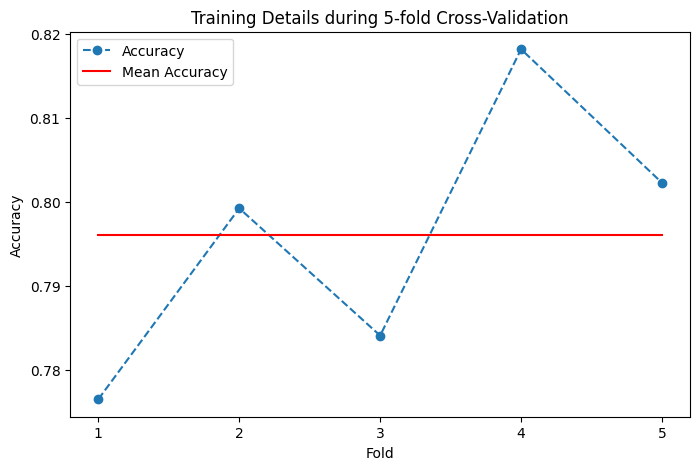

In [ ]:
# Model training with 5-fold cross-validation
lr_model = LogisticRegression(max_iter=10000)
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(lr_model, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

# Model testing and evaluation

**Random Forest**

Accuracy: 0.9810606060606061
Precision: 0.9817073170731707
Recall: 0.9877300613496932
F1-score: 0.9847094801223242
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



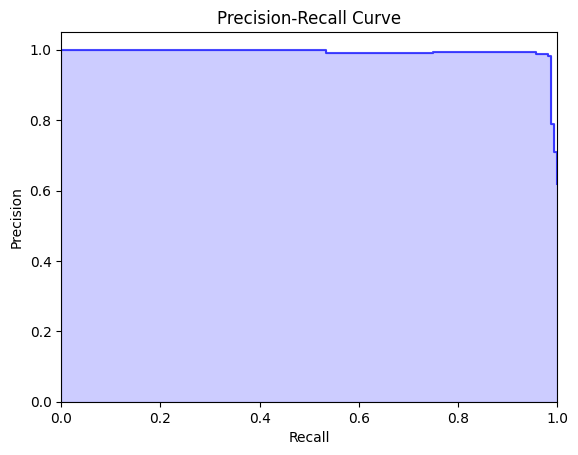

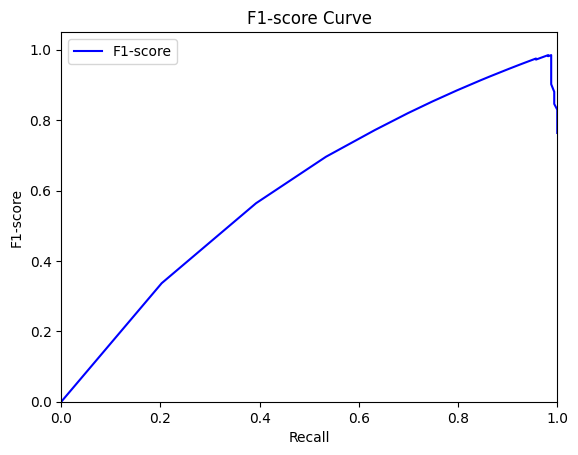

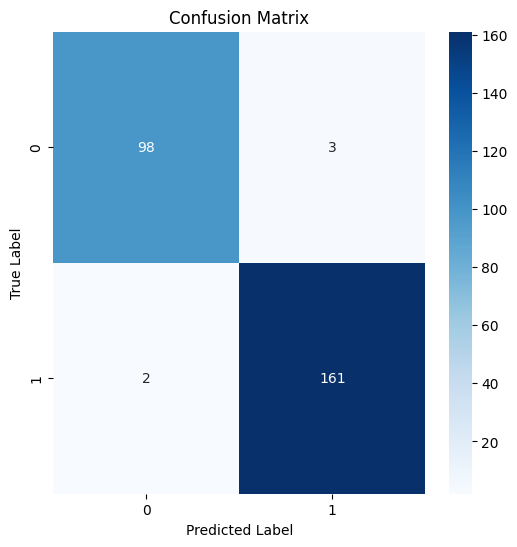

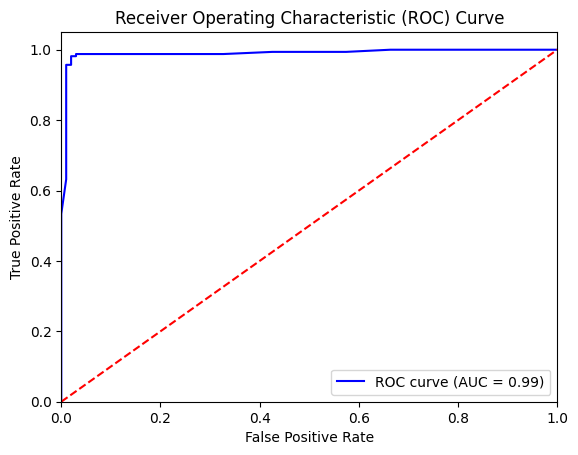

In [ ]:
# Model testing and evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**KNN**

Accuracy: 0.6212121212121212
Precision: 0.688622754491018
Recall: 0.7055214723926381
F1-score: 0.6969696969696969
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.49       101
           1       0.69      0.71      0.70       163

    accuracy                           0.62       264
   macro avg       0.60      0.60      0.60       264
weighted avg       0.62      0.62      0.62       264



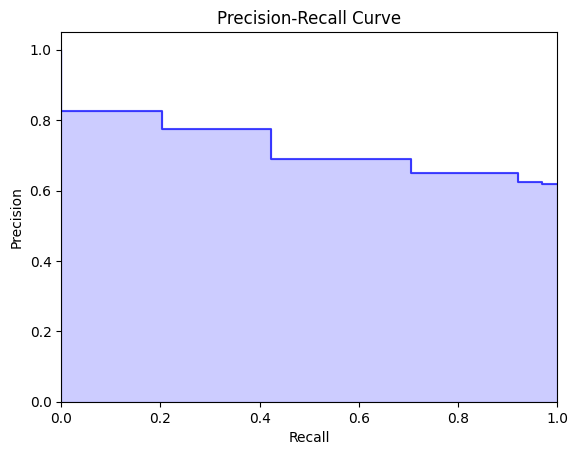

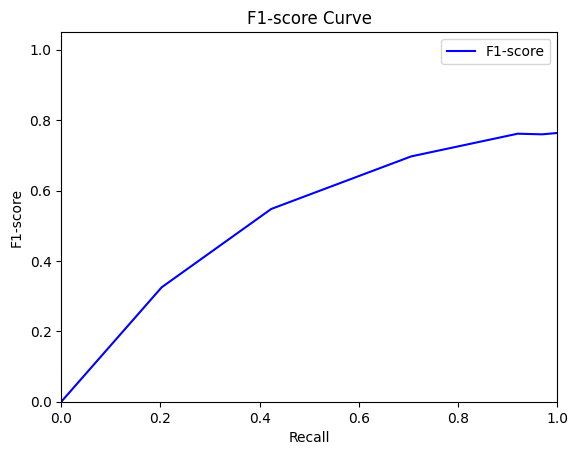

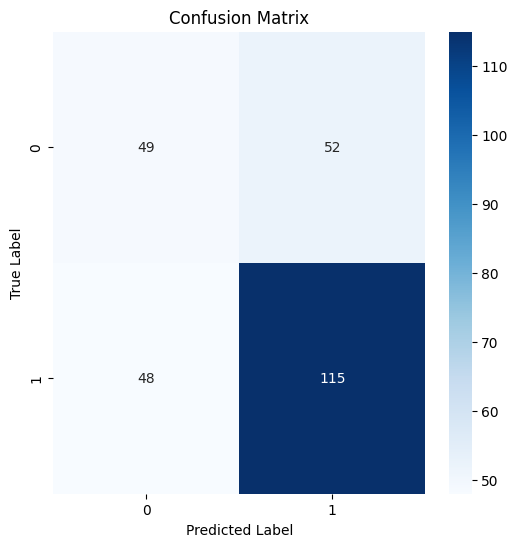

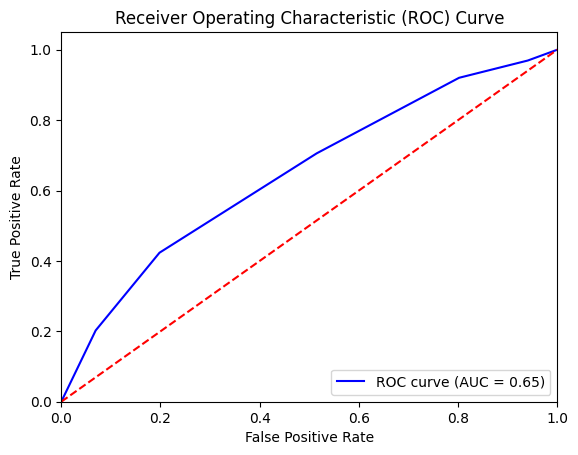

In [ ]:
# Model testing and evaluation
y_pred = knn_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = knn_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Naive Bayes**

Accuracy: 0.8939393939393939
Precision: 0.9927007299270073
Recall: 0.8343558282208589
F1-score: 0.9066666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       101
           1       0.99      0.83      0.91       163

    accuracy                           0.89       264
   macro avg       0.89      0.91      0.89       264
weighted avg       0.91      0.89      0.90       264



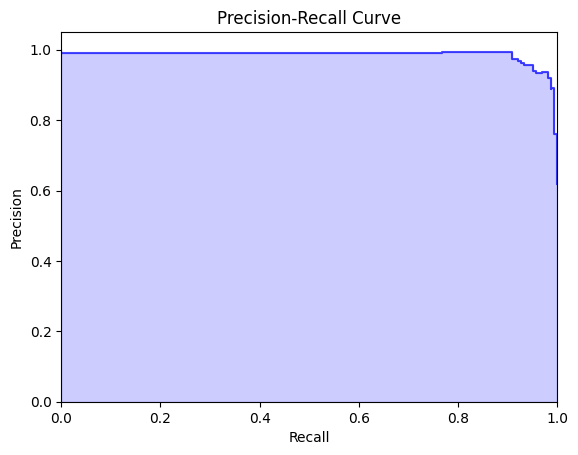

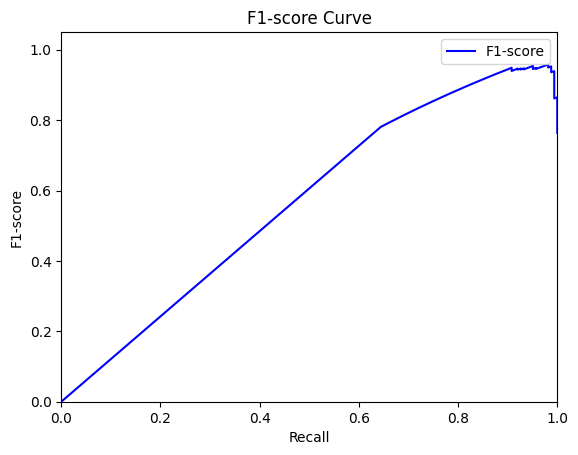

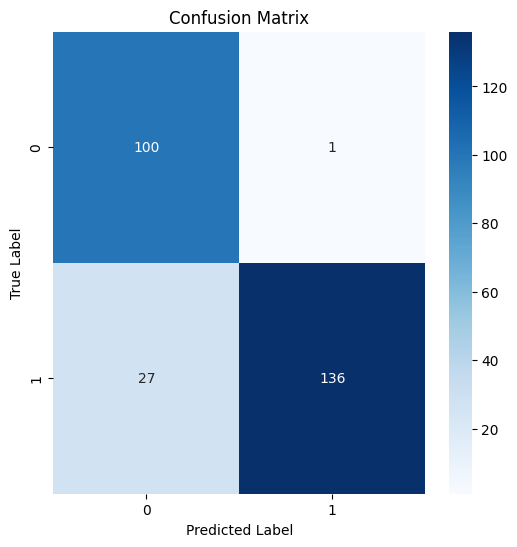

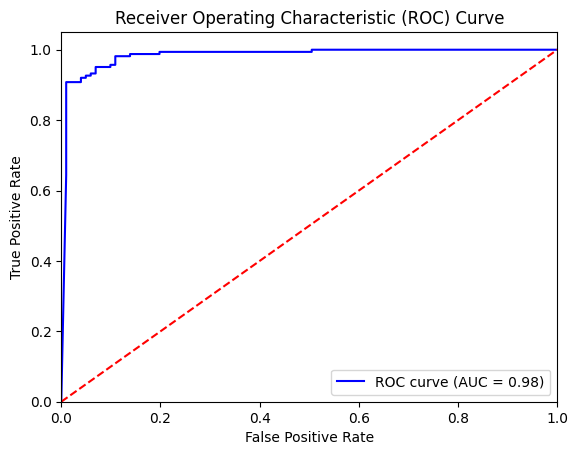

In [ ]:
# Model testing and evaluation
y_pred = nb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = nb_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

Accuracy: 0.7916666666666666
Precision: 0.813953488372093
Recall: 0.8588957055214724
F1-score: 0.8358208955223881
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       101
           1       0.81      0.86      0.84       163

    accuracy                           0.79       264
   macro avg       0.78      0.77      0.78       264
weighted avg       0.79      0.79      0.79       264



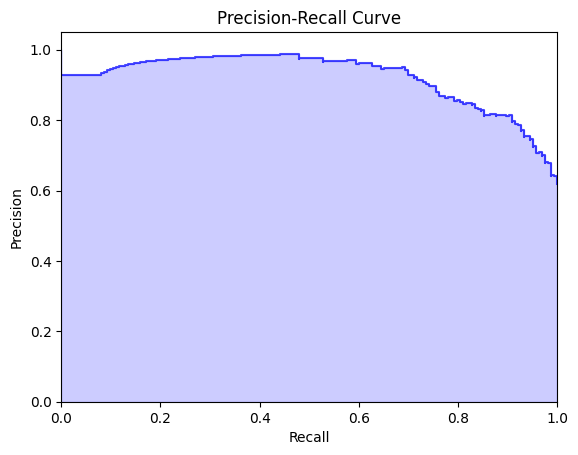

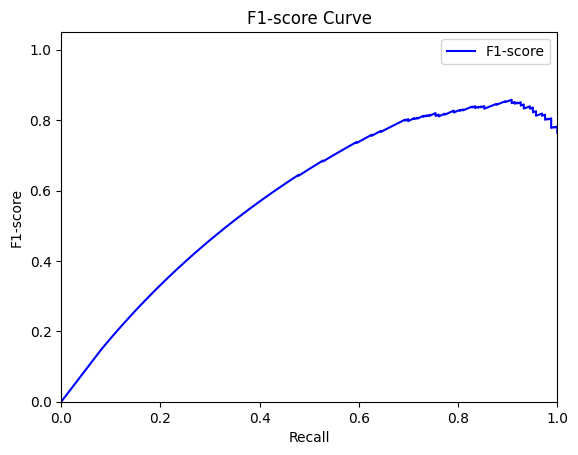

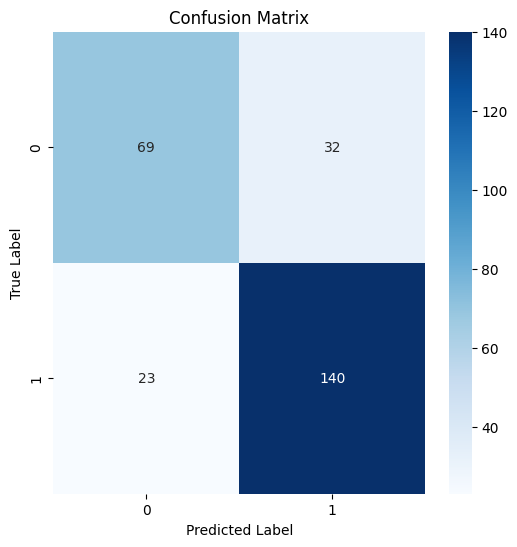

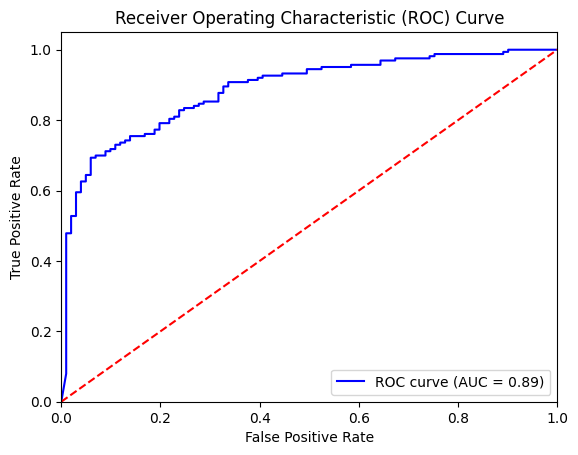

In [ ]:
# Model testing and evaluation
y_pred = lr_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = lr_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Train test graphs

**Random Forest**

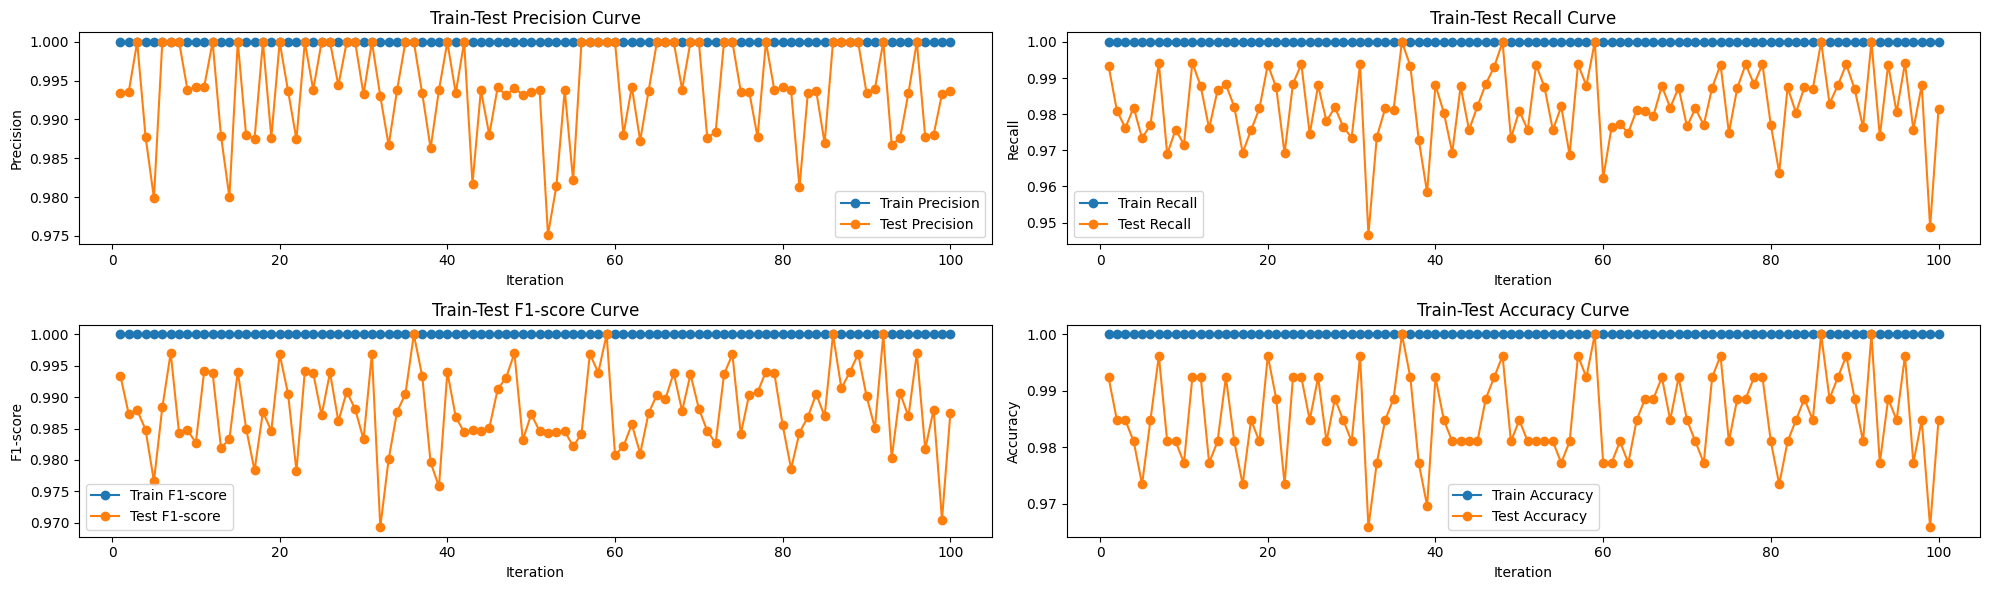

In [ ]:
data = data

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

**KNN**

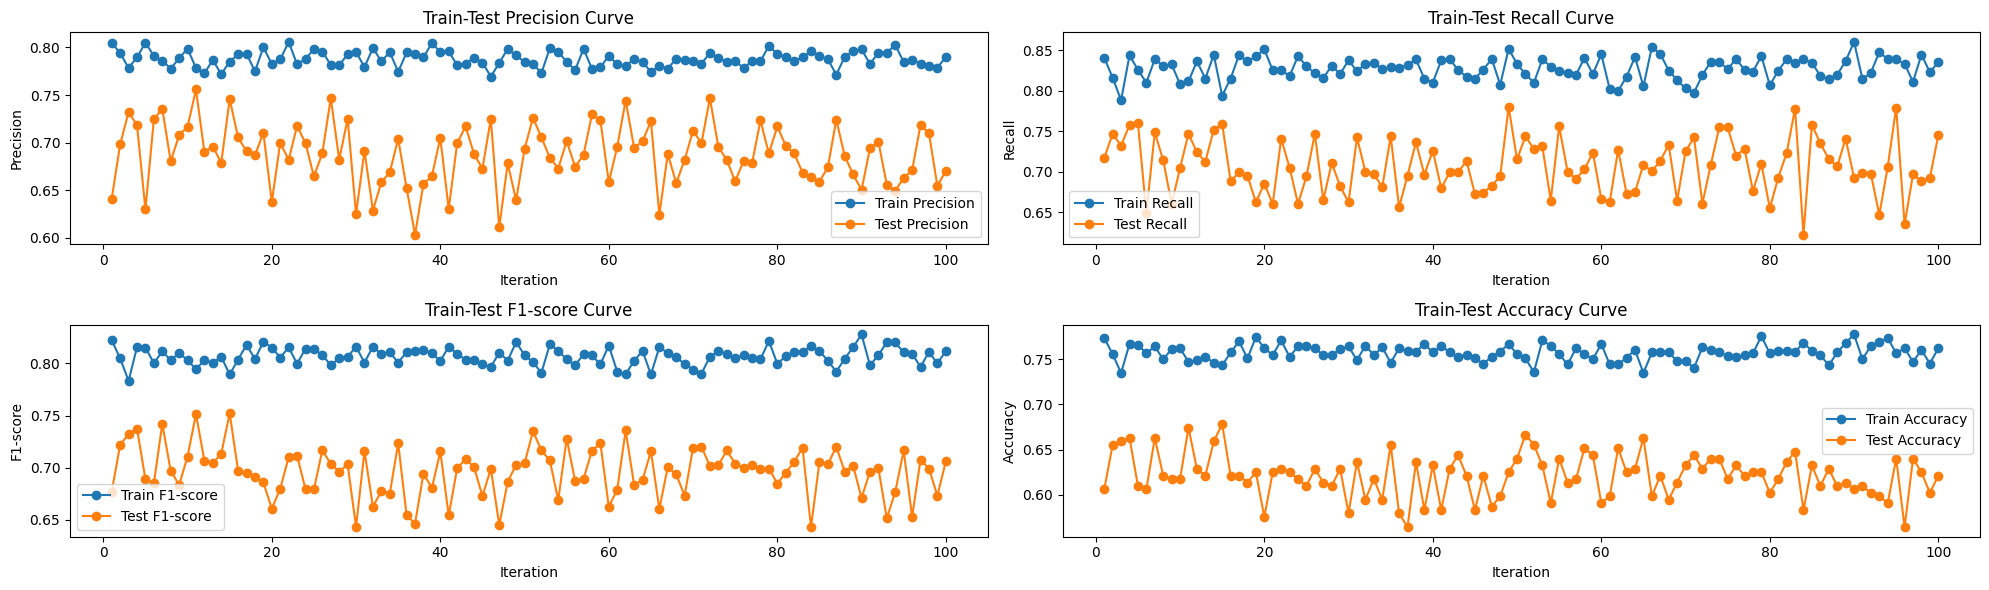

In [ ]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


**Naive Byes**

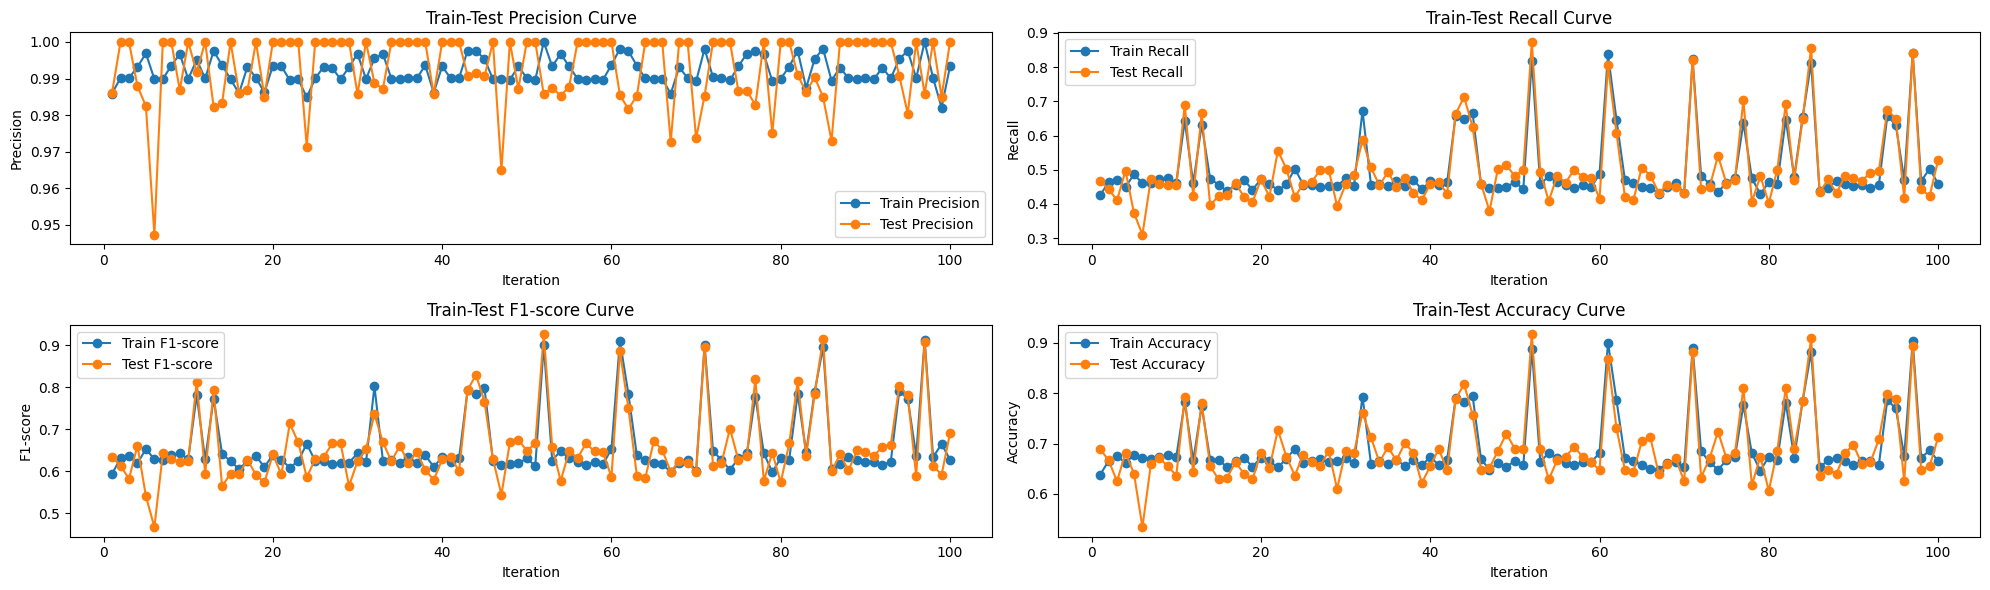

In [ ]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    nb_model = GaussianNB()
    nb_model = nb_model.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = nb_model.predict(X_train)
    y_test_pred = nb_model.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

**Logistic Regression**

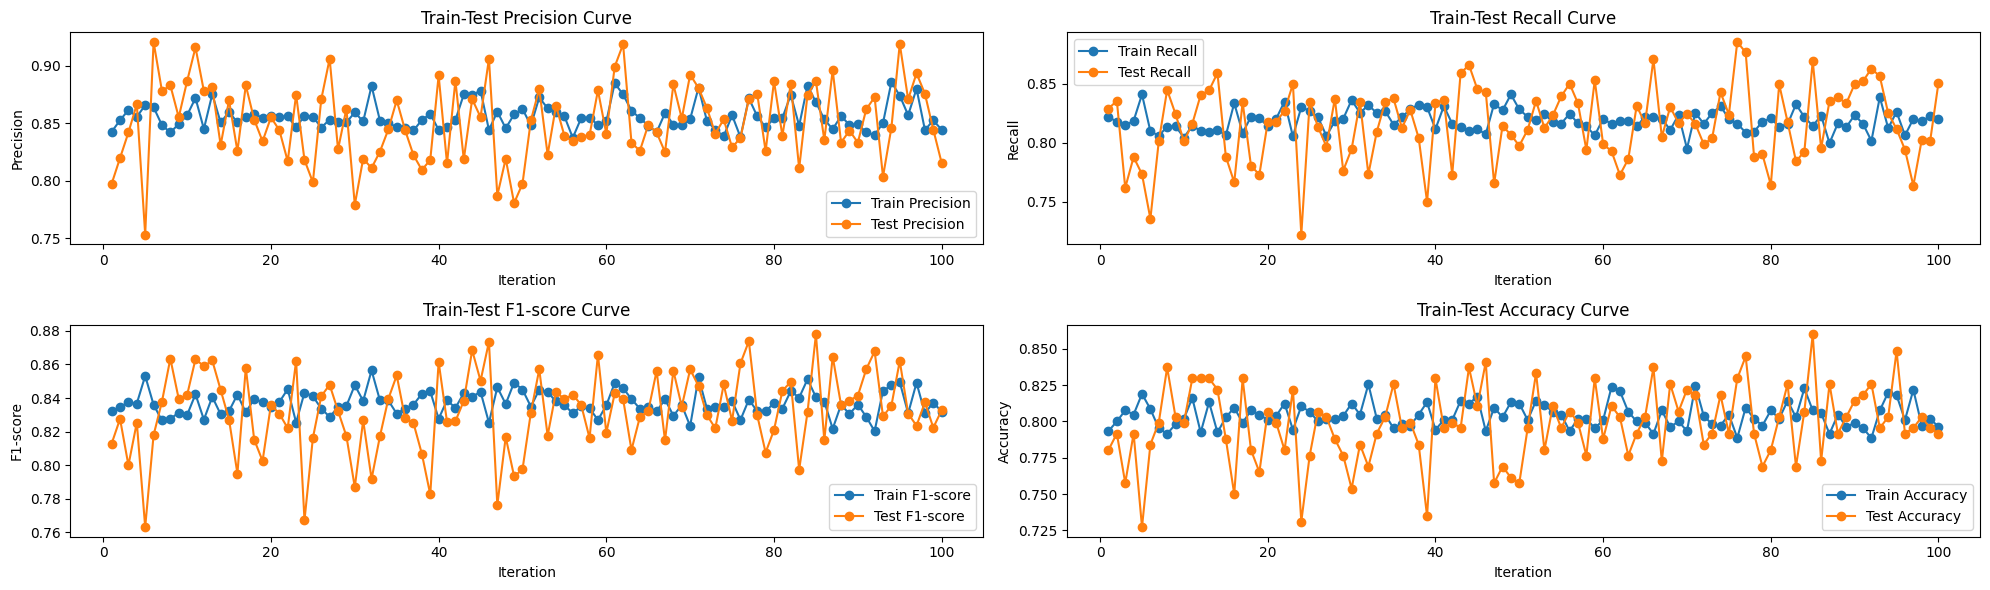

In [9]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    lr_model = LogisticRegression(max_iter=10000)
    lr_model = lr_model.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# User Input

In [ ]:
# User Input for Prediction
print("Please enter the values for the following features:")
print("Note: In gender for male enter 1; for female enter 0.")
user_input = {}
for feature in X.columns:
    user_input[feature] = float(input(f"{feature}: "))

# Convert user input into DataFrame and predict
user_data = pd.DataFrame(user_input, index=[0])
prediction = rf_classifier.predict(user_data)

if prediction[0] == 1:
    print("The model predicts that the person is likely to have heart attack.")
else:
    print("The model predicts that the person is unlikely to have heart attack.")

Please enter the values for the following features:
Note: In gender for male enter 1; for female enter 0.
Age: 37
Gender: 1
Heart rate: 55
Systolic blood pressure: 88
Diastolic blood pressure: 88
Blood sugar: 225
CK-MB: 6.56
Troponin: 1.003
The model predicts that the person is likely to have heart attack.
